In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data= pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

In [10]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [11]:
city_data.columns

Index(['city', 'driver_count', 'type'], dtype='object')

In [12]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [13]:
ride_data.columns

Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [18]:
city_ride_data = pd.merge(ride_data, city_data, how="left", on="city")
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [23]:
city_ride_data["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [41]:
# Takes in a column name in 
def filterType(column_name):
    filtered_df = city_ride_data[city_ride_data["type"]==column_name]
    return filtered_df

# Takes in the filtered dataframe and returns a tuple of three values
def getData(df):
    df_count = df.groupby(["city"]).count()["ride_id"]
    df_avg_fare = df.groupby(["city"]).mean()["fare"]
    df_driver_count = df.groupby(["city"]).mean()["driver_count"]
    return df_count, df_avg_fare, df_driver_count


# Takes in the getData tuple elements, color, and label of data as string, then returns a scatter plot
# Adjust scatter as needed to make the plot look nice for all three plots
def buildScatter(ride_count, avg_fare, driver_count, color, label):
        scatter = plt.scatter(ride_count, avg_fare, 
                              s=10*driver_count, c=color, 
                              edgecolor="black", marker="o",
                              alpha="0.8", label=label)
        return scatter

In [32]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = filterType("Urban")
suburban_cities = filterType("Suburban")
rural_cities = filterType("Rural")

In [33]:
urban_ride_count, urban_avg_fare, urban_driver_count = getData(urban_cities)
suburban_ride_count, suburban_avg_fare, suburban_driver_count = getData(suburban_cities)
rural_ride_count, rural_avg_fare, rural_driver_count = getData(rural_cities)

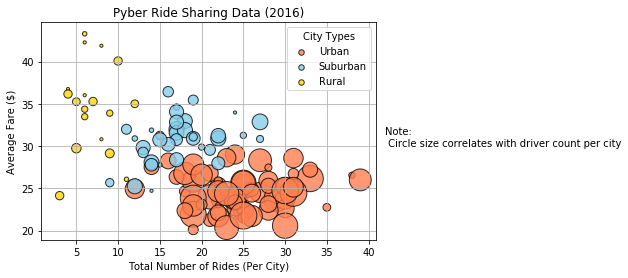

In [46]:
# Build the scatter plots for each city types
urban_scatter = buildScatter(urban_ride_count, urban_avg_fare, urban_driver_count, 
                             "coral", "Urban")
suburban_scatter = buildScatter(suburban_ride_count, suburban_avg_fare, suburban_driver_count, 
                                "skyblue", "Suburban")
rural_scatter = buildScatter(rural_ride_count, rural_avg_fare, rural_driver_count, 
                             "gold", "Rural")

urban_scatter
suburban_scatter
rural_scatter

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()

# Create a legend, since we used size in our scatter, we have to readjust the legendHandles
legend = plt.legend(loc="best", title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 30, "Note: \n Circle size correlates with driver count per city")

# Save Figure
plt.savefig("pyber_scatter.png")

plt.show()

## Total Fares by City Type

In [69]:
city_ride_data.groupby("type").sum()["fare"].index.values

array(['Rural', 'Suburban', 'Urban'], dtype=object)

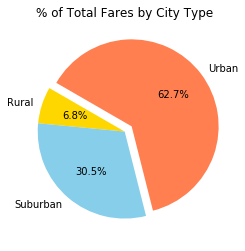

In [71]:
fare_percentage = city_ride_data.groupby("type").sum()["fare"] / city_ride_data["fare"].sum() * 100
city_labels = [x for x in city_ride_data.groupby("type").sum()["fare"].index.values]

plt.pie(fare_percentage,
       labels = city_labels,
       colors = ["gold", "skyblue", "coral"],
       explode = [0, 0, 0.1],
       autopct='%1.1f%%',
       startangle=150)

plt.title("% of Total Fares by City Type")
plt.savefig("total_fares_pie.png")
plt.show()

## Total Rides by City Type

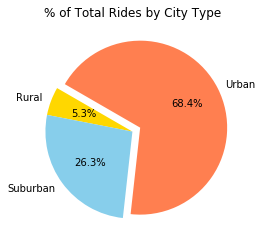

In [72]:
ride_percentage = city_ride_data.groupby("type").count()["ride_id"] / city_ride_data["ride_id"].count() * 100
city_labels = [x for x in city_ride_data.groupby("type").count()["ride_id"].index.values]

plt.pie(ride_percentage,
       labels = city_labels,
       colors = ["gold", "skyblue", "coral"],
       explode = [0, 0, 0.1],
       autopct='%1.1f%%',
       startangle=150)

plt.title("% of Total Rides by City Type")
plt.savefig("total_rides_pie.png")
plt.show()

## Total Drivers by City Type

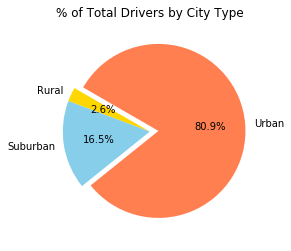

In [73]:
drivers_percentage = city_ride_data.groupby("type").sum()["driver_count"] / city_ride_data["driver_count"].sum() * 100
city_labels = [x for x in city_ride_data.groupby("type").sum()["driver_count"].index.values]

plt.pie(driver_percentage,
       labels = city_labels,
       colors = ["gold", "skyblue", "coral"],
       explode = [0, 0, 0.1],
       autopct='%1.1f%%',
       startangle=150)

plt.title("% of Total Drivers by City Type")
plt.savefig("total_drivers_pie.png")
plt.show()